In [66]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [67]:
!mkdir animation_frames

mkdir: animation_frames: File exists


In [68]:
import math

def plotPlane(theta_deg): 
    def plotObs(theta,ax):
        # Plot circle obstacle 2
        an = linspace(0,2*pi,100)
        r_circ = math.sqrt(5**2 + 12**2)
        theta_0_circ = math.atan(-5.0/10.0)
        theta_rel_circ = theta + theta_0_circ
        ax.plot(1*cos(an)+r_circ*math.sin(math.pi + theta_rel_circ), 1*sin(an) - r_circ*math.cos(math.pi + theta_rel_circ))

        # Plot circle obstacle 2
        an = linspace(0,2*pi,100)
        r_circ = math.sqrt(3**2 + 10**2)
        theta_0_circ = math.atan(3.0/10.0)
        theta_rel_circ = theta + theta_0_circ
        ax.plot(1*cos(an)+r_circ*math.sin(math.pi + theta_rel_circ), 1*sin(an) - r_circ*math.cos(math.pi + theta_rel_circ))

    plt.rcParams['figure.figsize'] = 13, 8
    fig, ax = plt.subplots()

    # Rotate for theta, measured as 0 true north
    theta = theta_deg*math.pi/180
    plotObs(theta,ax)

    def plotFOV(ax):
        FOVangle = 130*math.pi/180
        FOVlength = 10

        theta_neg = -FOVangle/2
        theta_pos = FOVangle/2

        ax.plot((0,FOVlength*math.cos(math.pi/2-theta_pos)),(0,FOVlength*math.sin(math.pi/2-theta_pos)),color='blue')
        ax.plot((0,FOVlength*math.cos(math.pi/2-theta_neg)),(0,FOVlength*math.sin(math.pi/2-theta_neg)),color='blue')



    ax.axis([-15, 15, -5, 20])

    im = plt.imread('tetrazeph.jpg')
    newax = fig.add_axes([0.477, 0.13, 0.07, 0.1], anchor='SW')
    newax.imshow(im)
    newax.axis('off')

    ax.set_aspect('equal', 'datalim')

    plotFOV(ax)


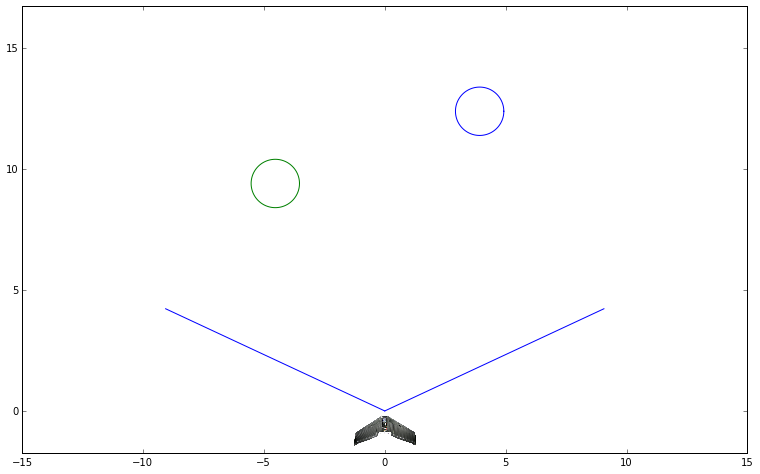

In [70]:
plotPlane(i)
plt.show()

In [79]:
# Output a set of images using plot3dsine()
nframes = 10 # Use 100 to produce bigger animation
print('Frame number:')
for i in xrange(0,nframes,1):
    time = i/25.0
    plotPlane(i);
    plt.savefig('animation_frames/frame{0:07d}.png'.format(i+1));
    plt.close()
    print i,

Frame number:
0 1 2 3 4 5 6 7 8 9


In [80]:
import os
#os.system("rm animation_frames/*.png")
os.system("rm animation_frames/amovie.mp4")
os.system("avconv -r 10 -i /Users/pflomacpro/GeometricPDEs/animation_frames/frame%07d.png -b:v 1000k /Users/pflomacpro/GeometricPDEs/animation_frames/amovie.mp4")

0

In [81]:
import io
import base64
from IPython.display import HTML

video = io.open('/Users/pflomacpro/GeometricPDEs/animation_frames/amovie.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))